# Background Information

Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

Once you’re done with your analysis, we need you to summarize your findings and provide some suggestions as to what else we need in order to fulfill their business problem. Please draft an email containing this information to the Data Science team leader to review before we send it to the client.



### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb


### Loading the Dataset

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/My Drive/Dataset/sample_sales_data.csv')

In [5]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [6]:
#Dropping the unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')

In [7]:
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [8]:
#Check the shape
print(df.shape)

(7829, 9)


Right off, the amount of data collected is insufficient. Moving on, The unnamed column was dropped cos it was useles. The product ID column also seems usless to our analysis as it contains strings of long words and numbers that isnt distinctive to any particular product. 

In [9]:
#Check for missing value
print(df.isnull().sum())


transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64


No missing values

In [10]:
#Datafram Summary
print(df.describe())


        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000


In [11]:
#Checking the datatype
print(df.dtypes)


transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object


In [12]:
#Summary Statistics
print(df.describe())


        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000


With the summary Statistics, we have quite some information. With regards to Unit price of each grocery, the minimum unit price is 0.1 and the max is almosgt 24 dollars. As we dive deeper into our analysis, we will identify what product these are

In [13]:
#Unique values in each column
for col in df.columns:
    print("{}: {} unique values".format(col, df[col].nunique()))


transaction_id: 7829 unique values
timestamp: 7738 unique values
product_id: 300 unique values
category: 22 unique values
customer_type: 5 unique values
unit_price: 64 unique values
quantity: 4 unique values
total: 256 unique values
payment_type: 4 unique values


Of importance here is the fact that 22 unique different categories, that the customers have been grouped into five differrent categories, and that we have 4 unique payment types

In [14]:
#Frequency Distribution for categories
print(df['category'].value_counts())


fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


In [15]:
#Frequency Distribution for customer_type
print(df['customer_type'].value_counts())

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


In [16]:
#Frequency Distribution for payment_type
print(df['payment_type'].value_counts())

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


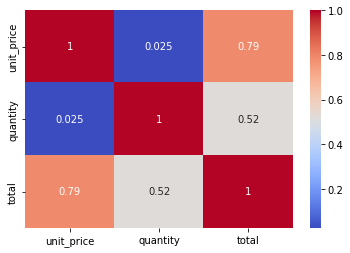

In [17]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


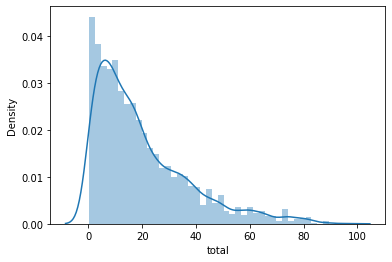

In [20]:
#Ddistribution of total price
sns.distplot(df['total'])
plt.show()

In [24]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
  corr = df.corr()
  corr.style.background_gradient(cmap='coolwarm')

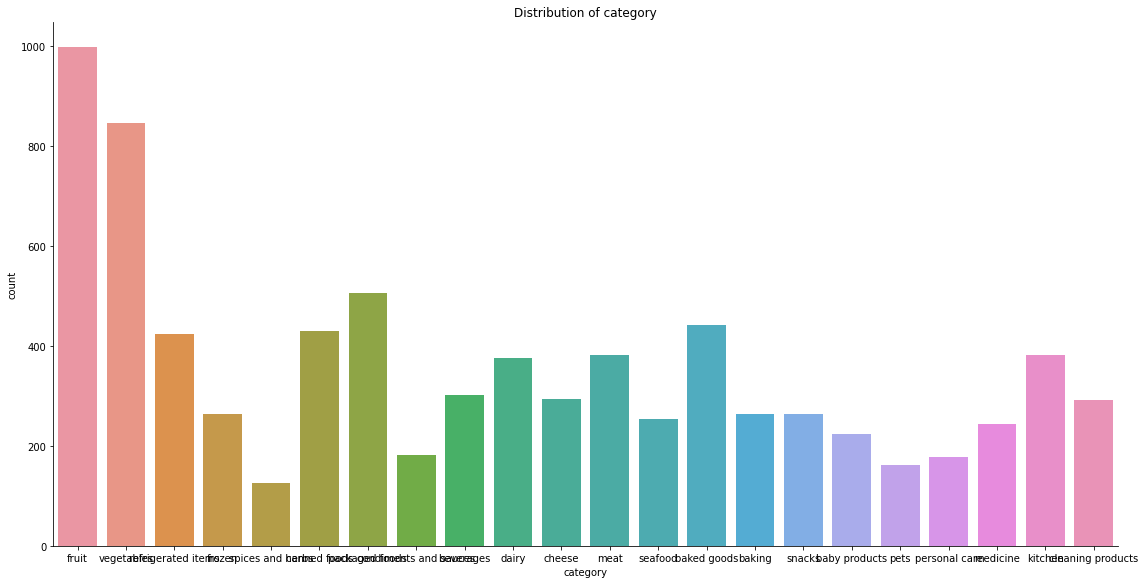

In [26]:
#Category column

column = "category"
plot_categorical_distribution(data=df, column="category")


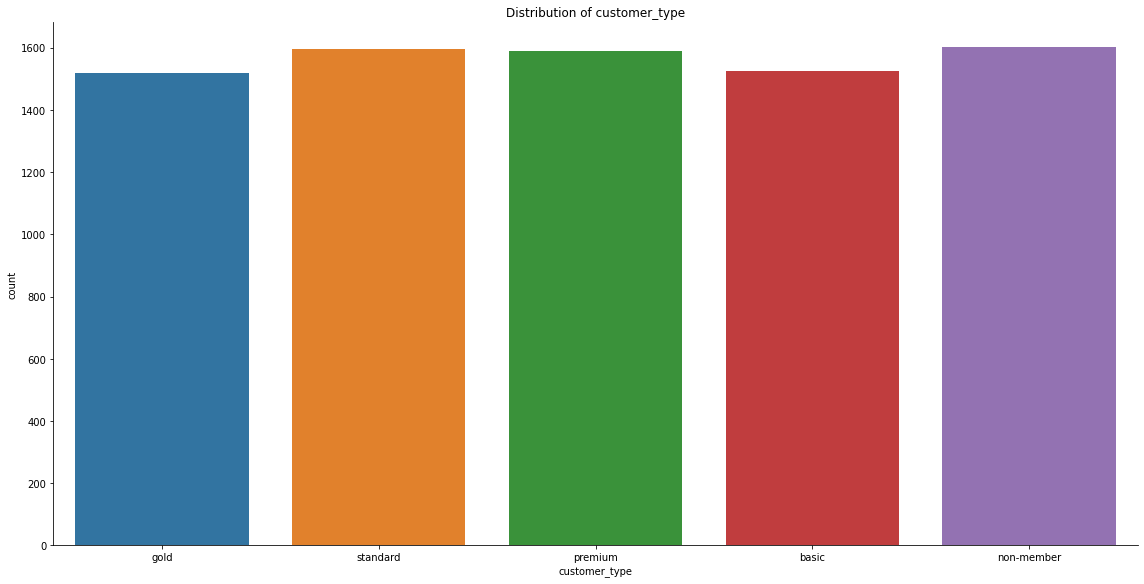

In [27]:
#customer_type column

column = "customer_type"
plot_categorical_distribution(data=df, column="customer_type")


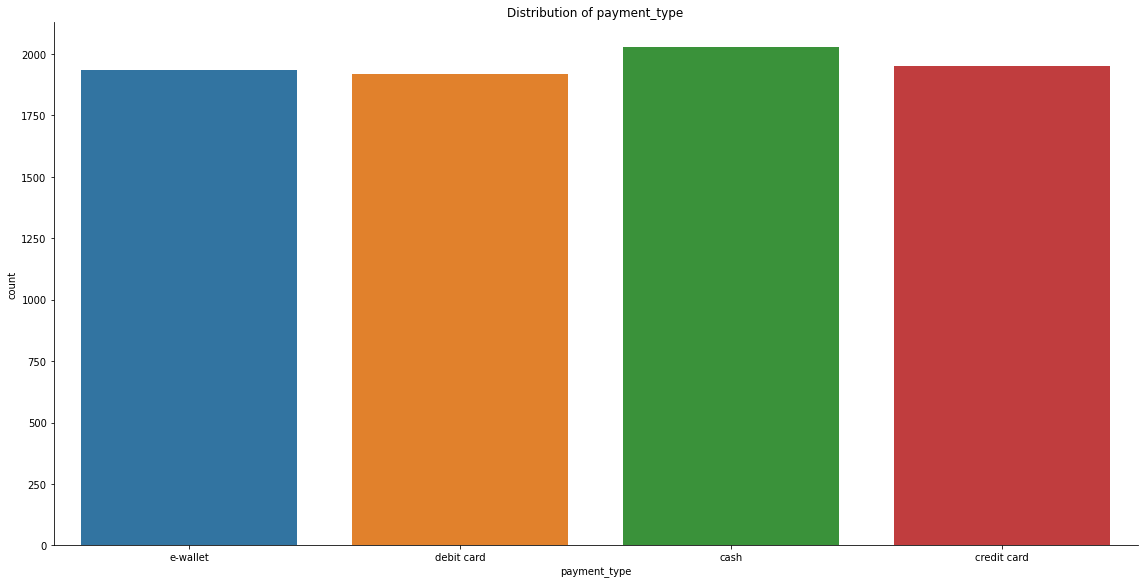

In [28]:
#payment type column

column = "payment_type"
plot_categorical_distribution(data=df, column="payment_type")
